In [6]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
my_data=[14.062,  1.168,  2.095,  7.502, 13.282,  6.93 ,  0.363,  2.678,
        0.766,  4.586,  3.491, 13.76 ,  9.746, 11.26 , 12.75 ,  7.226,
        2.027,  0.823,  4.651,  8.462]

In [8]:
def mse(any_slope,any_intercept):
    x=baby.column(1)
    y=baby.column(0)
    predicted = any_slope*x+any_intercept
    return np.mean((y-predicted)**2)
slope = minimize(mse)[0]
intercept = minimize(mse)[1]
print(intercept,slope)

NameError: name 'baby' is not defined

In [9]:
auto=Table().read_table("Auto.csv")

In [10]:
auto

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11,70,1,plymouth satellite
16,8,304,150,3433,12,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10,70,1,ford galaxie 500
14,8,454,220,4354,9,70,1,chevrolet impala
14,8,440,215,4312,8.5,70,1,plymouth fury iii
14,8,455,225,4425,10,70,1,pontiac catalina
15,8,390,190,3850,8.5,70,1,amc ambassador dpl


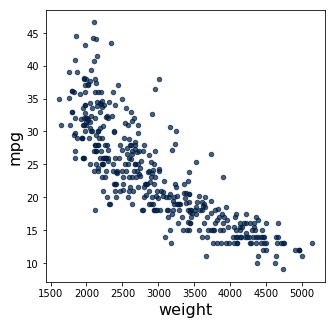

In [13]:
auto.scatter('weight', 'mpg')

In [14]:
def mse(any_slope,any_intercept):
    x=auto.column(4)
    y=auto.column(0)
    predicted = any_slope*x+any_intercept
    return np.mean((y-predicted)**2)
slope = minimize(mse)[0]
intercept = minimize(mse)[1]
print(intercept,slope)

46.31739911572654 -0.007676605751863636


In [16]:
mpg_3000 = intercept + slope*3000
mpg_3000

23.287581860135628

In [17]:
my_data

[14.062,
 1.168,
 2.095,
 7.502,
 13.282,
 6.93,
 0.363,
 2.678,
 0.766,
 4.586,
 3.491,
 13.76,
 9.746,
 11.26,
 12.75,
 7.226,
 2.027,
 0.823,
 4.651,
 8.462]

In [18]:
np.mean(my_data)

6.381399999999999

In [19]:
def likelihood_est(data, parameter):
    prod = 1
    for d in data:
        prod *= (1/parameter)*exp(-d/parameter)
    return prod

top = likelihood_est(my_data, 5)
bottom = likelihood_est(my_data, 6.3814)
print(top)
print(bottom)

8.609396035913773e-26
1.6435805832924255e-25


In [20]:
exp(1)

2.718281828459045

In [21]:
print(top/bottom)

0.523819526917713


In [23]:
rounds = 1000
est_3000_array = []

for i in range(rounds):
    new_auto = auto.sample(397, with_replacement=True)
    def mse(any_slope,any_intercept):
        x=new_auto.column(4)
        y=new_auto.column(0)
        predicted = any_slope*x+any_intercept
        return np.mean((y-predicted)**2)
    slope = minimize(mse)[0]
    intercept = minimize(mse)[1]
    est_3000_array.append(intercept + slope*3000)


In [26]:
print(percentile(2.5, est_3000_array))
print(percentile(97.5, est_3000_array))

print(105/125)

22.850705219538057
23.707941288076796
0.84
